# TP1 - Some Python exercices to get back into the swing of things
---

## Part 1. Basic Python (extra libs are prohibited)
---

### Exercise 1.

Write a python function that:
1. Reads the file `users.csv` line per line
2. Prints the sentence `<name> has <age> years old.` for each line

Here is a demo about how to read a file line per line

    with open("path to the file", "r") as finput: # "r" means read mode and finput is a variable (its name is free)
        for line in f :
            print(l)

To split a string `s` according to a separator `sep` you should use the `split` function (`s.split(sep)`). This function returns a list.

In [1]:
def exercise1():
    string = "{n} has {a} years old."
    first = True
    pathfile = "users.csv"
    with open(pathfile, "r") as finput : 
        for line in finput :
            if not first : 
                tline = line.split(";")
                name = tline[1]
                age = tline[2]
                print(string.format(n=name,a=age))
            else :
                first = False       

In [ ]:
# Once the function has been defined, I can call it
exercise1()

### Exercise 2.

Write a python function that:
1. Loads the user information from `users.csv` into a dictionary `dUsers`
2. Returns `dUsers`


`dUsers` must follow the following format:

    dUsers = {
        id: {
            "name" : name,
            "age" : age,
            "sex" : sex,
            "interests" : ["interest1", "interest2"]
        }
    }

In [4]:
def exercise2():
    first = True
    dresult = {}
    pathfile = "/Users/pitarch/Pro/OneDrive - MIAGE/M2SE_WEBMINING/TP/TP1/2019/data_tp1/part1/users.csv"
    with open(pathfile, "r") as f :
        for line in f : 
            if not first :
                tline = line.split(";")
                interests = tline[-1].strip().split(",")
                iduser = int(tline[0])
                name = tline[1]
                age = int(tline[2])
                sex = tline[3]
                dresult[iduser] = {"age": age, "name": name, "sex": sex, "interests": interests}
                
            else :
                first = False
    return dresult
    

In [5]:
from pprint import pprint
dUsers = exercise2()
pprint(dUsers)

{1: {'age': 25,
     'interests': ['sport', 'python', 'art'],
     'name': 'Bob',
     'sex': 'M'},
 2: {'age': 32,
     'interests': ['R', 'statistics', 'jazz', 'sport'],
     'name': 'Miles',
     'sex': 'M'},
 3: {'age': 18, 'interests': ['music', 'TV'], 'name': 'Tom', 'sex': 'M'},
 4: {'age': 45,
     'interests': ['art', 'statistics', 'python', 'R'],
     'name': 'Paul',
     'sex': 'M'},
 5: {'age': 30,
     'interests': ['sport', 'python', 'music'],
     'name': 'Ella',
     'sex': 'F'},
 6: {'age': 55,
     'interests': ['music', 'statistics'],
     'name': 'Janis',
     'sex': 'F'},
 7: {'age': 38,
     'interests': ['music', 'R', 'statistics'],
     'name': 'Nina',
     'sex': 'F'}}


### Exercise 3.

Using the data structure you just have created, write two python functions that: 
1. Returns the name of the oldest user
2. Returns then number of users who like python

In [6]:
def exercise3a() : 
    # Return the oldest users
    maxAge = 0
    oldestUserName = ""
    for idUser in dUsers : 
        currentAge = dUsers[idUser]["age"]
        if currentAge > maxAge : 
            maxAge = currentAge
            oldestUserName = dUsers[idUser]["name"]
    return oldestUserName

exercise3a()

'Janis'

In [ ]:
def exercise3b():
    # Return the number of users who like python
    nbPython = 0
    for idUser in dUsers : 
        if "python" in dUsers[idUser]["interests"] :
            nbPython += 1
    return nbPython

exercise3b()

### Exercise 4.

We now consider the links between users and thus manipulate the `links.csv` file. Create a python function that returns an adjacency list `dRel` with the following format.

    dRel = {
       id : [list of connected users]
    }

In [ ]:
def exercise4():
    dRes = {}
    path = "data_tp1/links.csv"
    with open(path,"r") as fpath :
        for l in fpath :
            tline = l.strip().split(";")
            user1 = int(tline[0])
            user2 = int(tline[1])
            dRes.setdefault(user1, [])
            dRes.setdefault(user2, [])
            dRes[user1].append(user2)
            dRes[user2].append(user1)
    return dRes

dRel = exercise4()
pprint(dRel)

### Exercise 5.

Write two Python functions that:
1. Return the name of the user who has the biggest number of friends
2. Return the name of the user who has the biggest number of friends of the opposite sex

In [ ]:
def exercise5a():
    maxFriends = 0
    idUserMaxFriends = 0 
    for idUser in dRel : 
        if len(dRel[idUser]) > maxFriends : 
            maxFriends = len(dRel[idUser])
            idUserMaxFriends = idUser
            
    nameMaxFriends = dUsers[idUserMaxFriends]["name"]
    return nameMaxFriends

nameMaxFriends = exercise5a()
print(nameMaxFriends)
        

In [ ]:
def exercise5b():
    
    def getNumberOfFriendsOppositeSex(idUser):
        count = 0
        sexUser = dUsers[idUser]["sex"]
        for idFriend in dRel[idUser] : 
            if dUsers[idFriend]["sex"] != sexUser : 
                count += 1
        return count
                
    
    maxFriendsOppositeSex = 0
    idUserMaxFriendsOppositeSex = 0 
    for idUser in dRel : 
        currentNbFriendsOppositeSex = getNumberOfFriendsOppositeSex(idUser)
        if currentNbFriendsOppositeSex > maxFriendsOppositeSex : 
            maxFriendsOppositeSex = currentNbFriendsOppositeSex
            idUserMaxFriendsOppositeSex = idUser
            
    nameMaxFriendsOppositeSex = dUsers[idUserMaxFriendsOppositeSex]["name"]
    return nameMaxFriendsOppositeSex

nameOppositeSex = exercise5a()
print(nameOppositeSex)

###  Exercise 6 (optional)

The purpose of this last exercise it to write a basic recommender system that implements the following principle: for each user, the system should recommend the majority interest of his/her friend. Obviously, if this majority interest is shared by the user, the second most majority is recommended.

In [ ]:
def recommenderSystem(idUser):
    
    interestUser = dUsers[idUser]
    listFriends = dRel[idUser]
    dInterestFriends = {}
    for idFriend in listFriends :
        for interest in dUsers[idFriend]["interests"] :
            dInterestFriends.setdefault(interest,0)
            dInterestFriends[interest] += 1
    
    # Sort interests in descending order
    rankedInterests = [(k, dInterestFriends[k]) for k in sorted(dInterestFriends, key=dInterestFriends.get, reverse=True)]
    
    print(rankedInterests)
    
    for interest, count in rankedInterests : 
        if interest not in interestUser : 
            return interest
    
    return "No interest to recommend"

def exercise6() : 
    for idUser in dUsers : 
        userName = dUsers[idUser]["name"]
        result = recommenderSystem(idUser)
        print("Recommendation for user {n}: {r}".format(n=userName,r=result))

exercise6()
    

## Part 2. An introduction to Python for data scientist
---

**There are 5 major steps in any data science / machine learning project :** 

- **Data exploration**
- **Data formatting**
- **Model validation**
- **Prediction**
- **Result submission**

A brief introduction about how these steps can be handled in Python (>= 3.6) is given below.

### Essential libraries
_______
![Pandas](img/pandas_logo.png) 

Pandas is a library written for the Python programming language that allows data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical vectors and time series. 

- The `DataFrame` object to manipulate data easily and efficiently with indexes that can be strings;
- Tools to read and write structured data in memory from and to different formats: CSV files, text files, Microsoft Excel spreadsheet file, SQL database...;
- intelligent data alignment and missing data management (NaN = not a number). label-based data alignment (character strings). sorting according to various totally disordered data criteria;
- Resizing and pivot table;
- Merging and joining of large volumes of data;
- Time series analysis.


Documentation link: https://pandas.pydata.org/pandas-docs/stable/

_______
![Numpy](img/numpy_logo.png) 

NumPy is an extension of the Python programming language, designed to manipulate multidimensional matrices or tables as well as mathematical functions operating on these tables.
It offers much more efficient types and operations than the standard lib, and has shortcuts for mass processing.

Documentation link: https://docs.scipy.org/doc/
____

![Matplotlib](img/plt_logo.png) 

Matplotlib is a library of the Python programming language designed to plot and visualize data in graphical form. It can be combined with the NumPy and SciPy python scientific computation libraries.

Documentation link: https://matplotlib.org/contents.html


____

![Sklogo](img/sk_logo.png)

Scikit-learn is a free Python library dedicated to automatic learning. It is developed by many contributors, particularly in the academic world, by French institutes of higher education and research such as Inria and Télécom ParisTech. It includes functions for estimating random forests, logistic regressions, classification algorithms, and support vector machines. It is designed to harmonize with other free Python libraries, including NumPy and SciPy.

Documentation link: http://scikit-learn.org/stable/

---
### Let's start coding!

#### Headers

Here are the first lines of almost all data scientist Python scripts. It aims at importing the libraries you will use in the following. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib
import numpy as np
# Only if you are using notebooks
%matplotlib inline 

#### Import the data
In machine learning competitions, two files are usually given. A training file that is used to learn the machine learning algorithm and a test file that is used to measure the performance of the algorithm.

**Instructions: read the pandas documentation and find how to read the two csv files. Then, print the first ten lines of the train data frame using the** `head` **function.**

In [17]:
train = pd.read_csv('data_tp1/part2/train.csv') 
test = pd.read_csv('data_tp1/part2/test.csv')
train.head(2) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


#### Data exploration

Let's talk about the context, we have to predict house prices.
As you should know, it is a problem of **SUPERVISED** machine learning, because a target variable (`SalePrice`) has to be predicted.
As we have to predict a value it is a regression problem so you will use regression algorithms.

**Instructions:** 
- **Print the column names of the** `training` **data frame using the** `columns` **primitive;**
- **Print the number of lines and columns of the** `training` **and** `test` **data frames using the** `shape` **primitive**


In [18]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
print(f'Train size: {train.shape} / test size: {test.shape}')

Train size: (1460, 81) / test size: (1459, 80)


#### Analysis of the target variable
**Instructions:**
- **Apply the** `describe` **function on the** `SalePrice` **column**
- **Call the seaborn** `distplot` **function on the** `SalePrice` **column**

In [20]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/pitarch/Pro/Soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


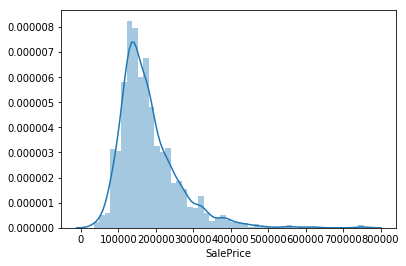

In [6]:
sns.distplot(train['SalePrice']) 

#### Relationship between numerical features and the target variable

The piece of code below shows how to plot a scatter plot of the two numerical variables `GrLivArea` and `SalePrice` (the target variable).

**Instructions.** Modify this piece of code to display the relationship between every numerical features and the target variable (you should use a loop).

**Hint.** To determine wheter a variable (column of the data frame) is numerical, you can have a look to the following [stack overflow post](https://stackoverflow.com/questions/19900202/how-to-determine-whether-a-column-variable-is-numeric-or-not-in-pandas-numpy).

```
# scatter plot grlivarea/saleprice
var = 'GrLivArea'

# A new data frame is created with only the desired columns (the two we would like to display)
price_surface = pd.concat([train['SalePrice'], train[var]], axis=1) 
price_surface.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.ylabel("Prix")
plt.xlabel("Surface habitable")
plt.show()
```

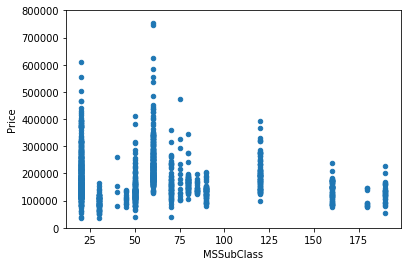

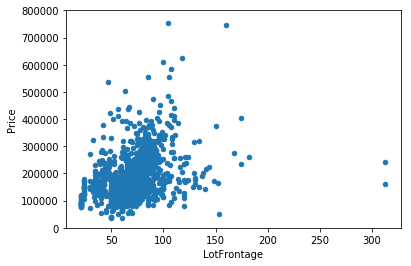

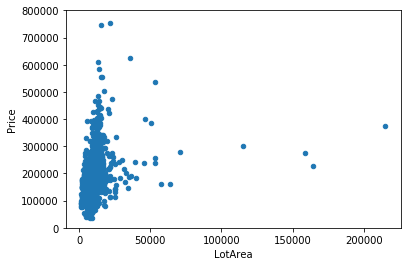

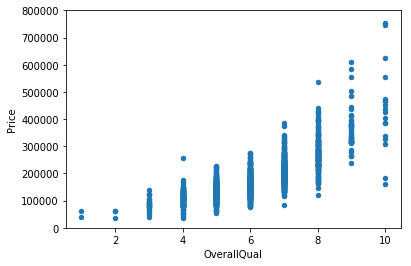

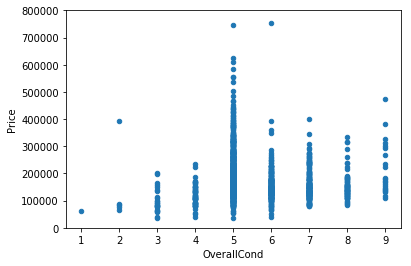

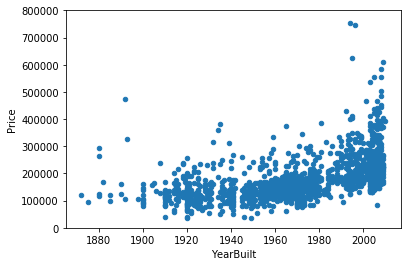

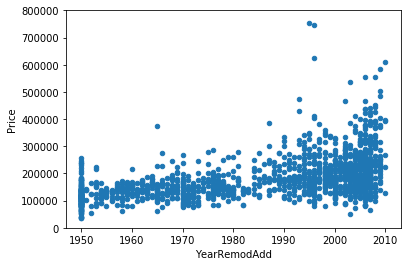

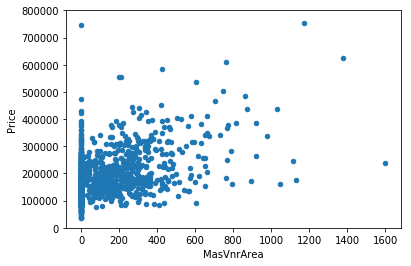

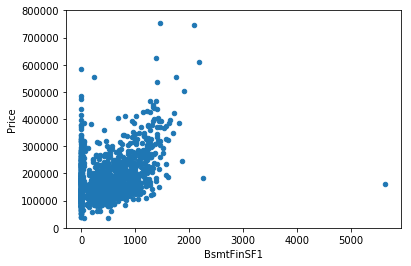

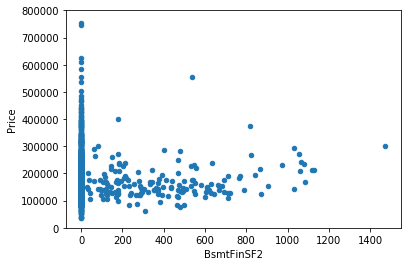

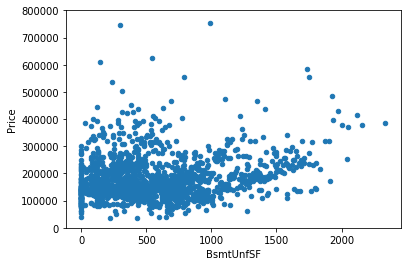

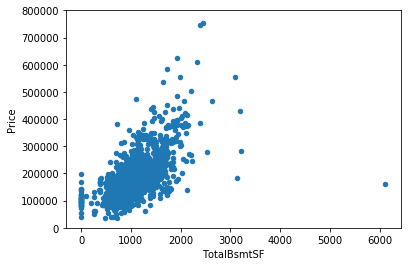

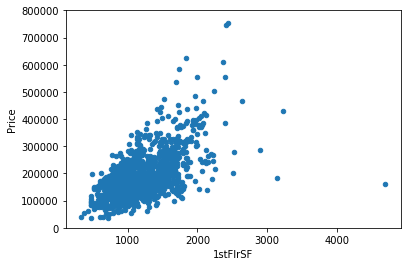

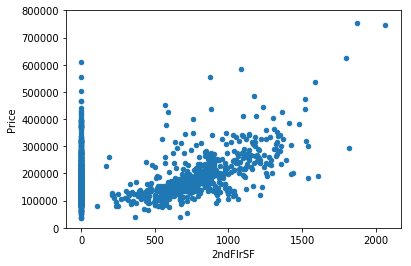

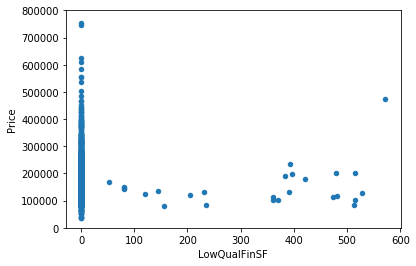

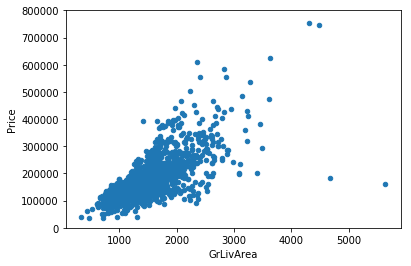

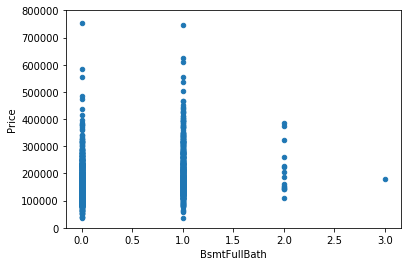

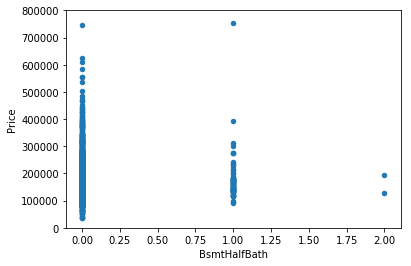

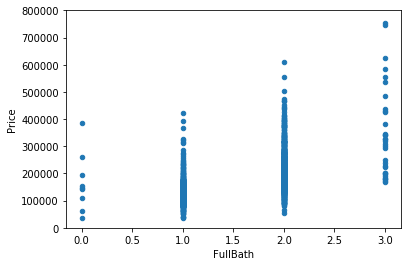

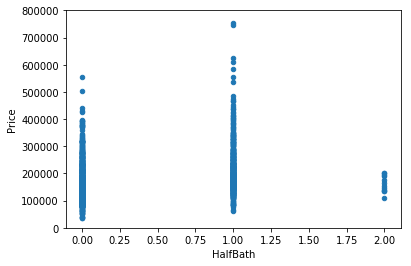

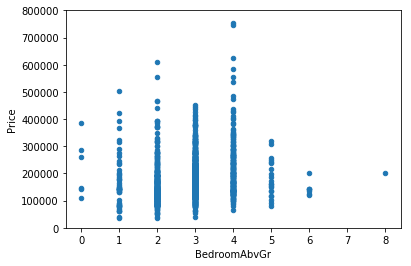

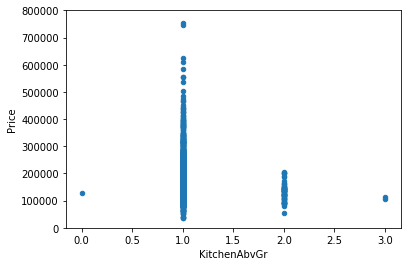

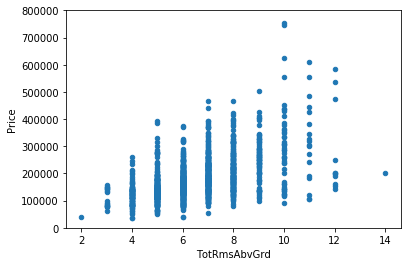

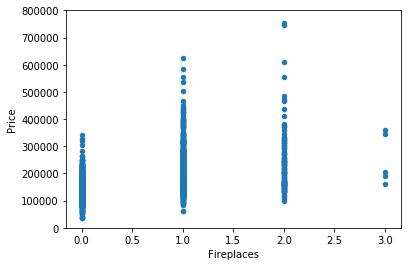

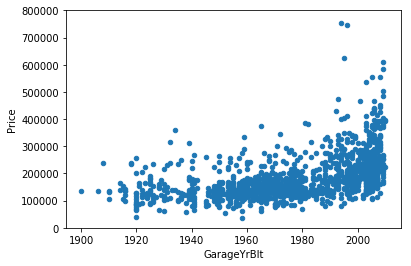

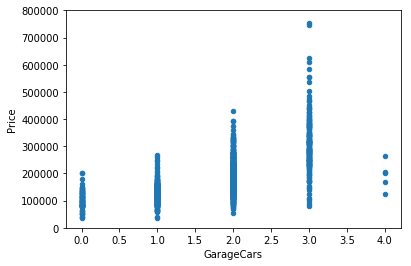

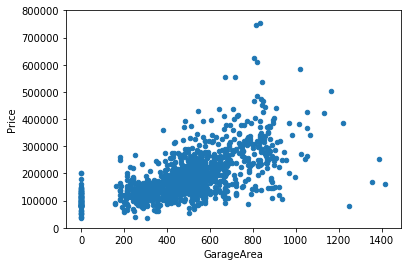

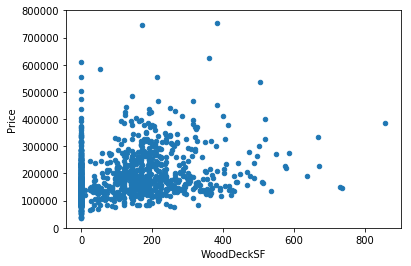

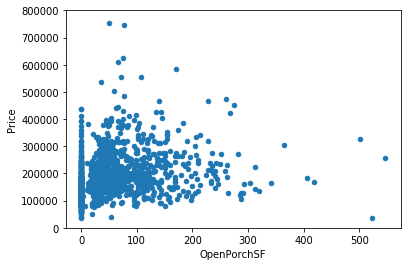

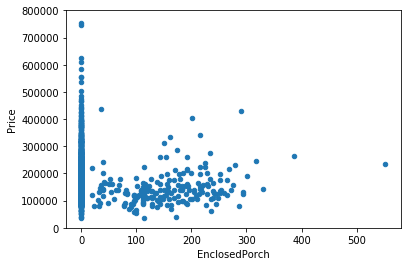

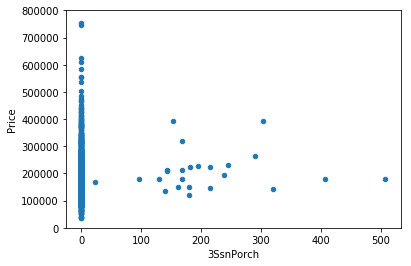

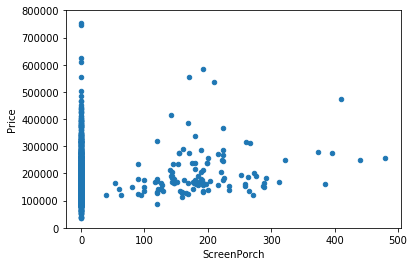

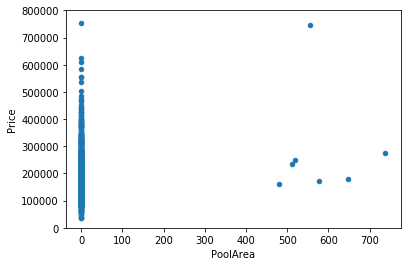

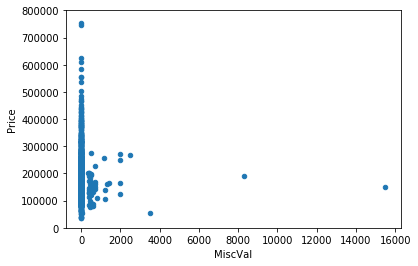

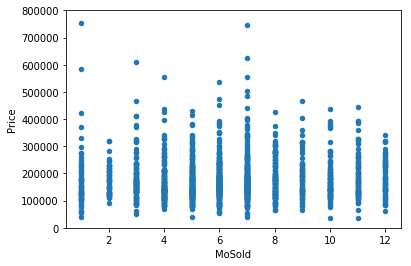

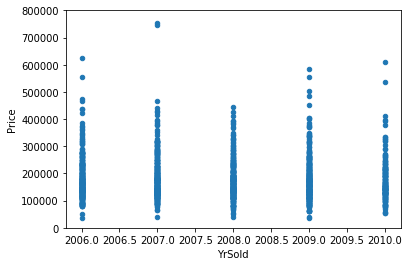

37


In [21]:
target = 'SalePrice'
count  = 1
for col in train.columns : 
    if col not in ("Id", target) and np.issubdtype(train[col].dtype, np.number) : 
        count += 1
        # A new data frame is created with only the desired columns (the two we would like to display)
        df = pd.concat([train[target], train[col]], axis=1) 
        df.plot.scatter(x=col, y=target, ylim=(0,800000))
        plt.ylabel("Price")
        plt.xlabel(col)
        plt.show()
print(count)

#### Relationship between categorical features and the target variable

The piece of code below shows how to plot a boxplot of the categorical variables `SaleCondition` w.r.t. the target variable.

**Instructions.** Modify this piece of code to display the relationship between every categorical features and the target variable (you should use a loop).

**Hint.** To determine wheter a variable (column of the data frame) is categorical, you can have a look to the following [stack overflow post](https://stackoverflow.com/questions/19900202/how-to-determine-whether-a-column-variable-is-numeric-or-not-in-pandas-numpy).

/Users/pitarch/Pro/Soft/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


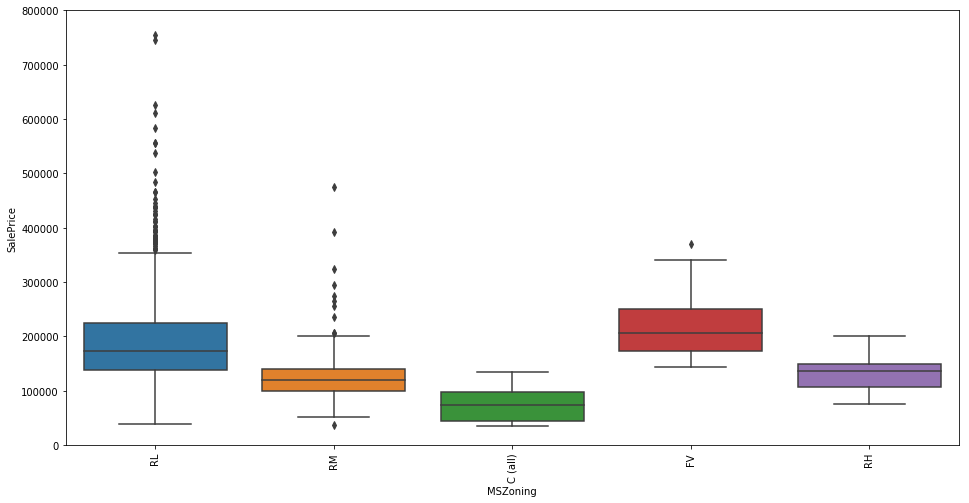

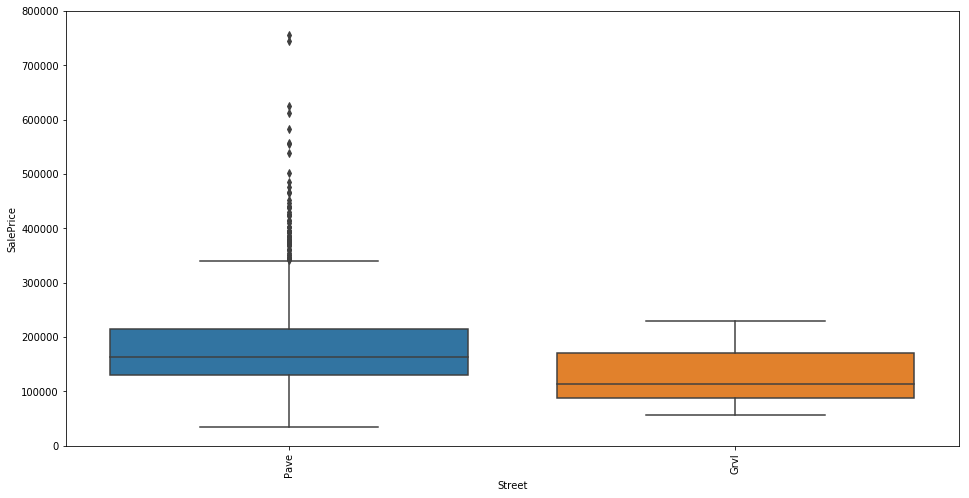

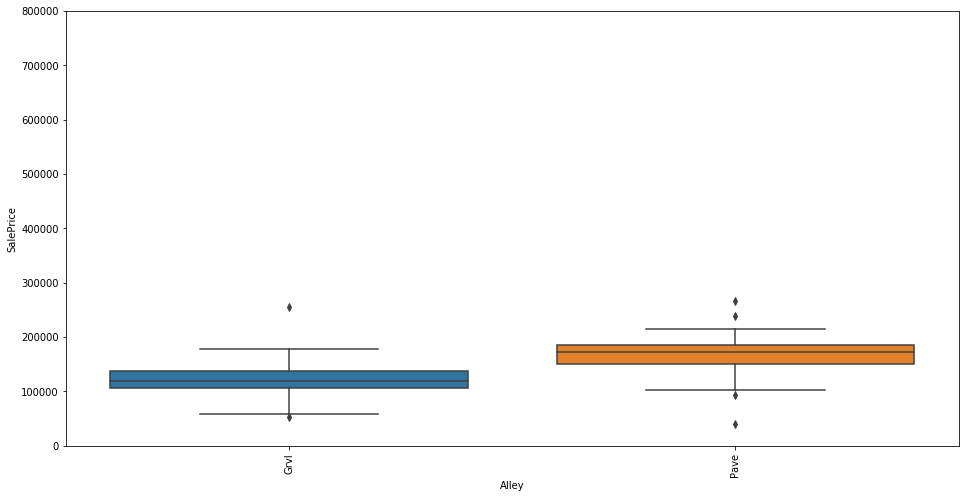

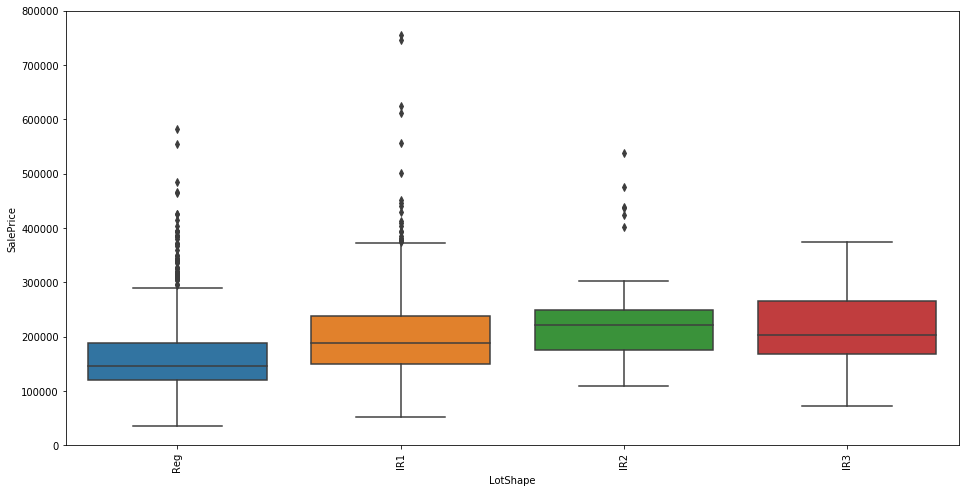

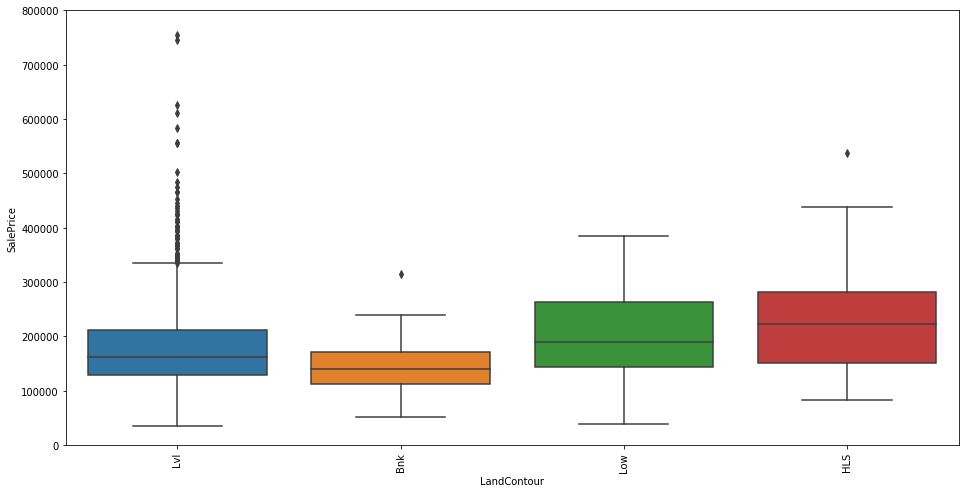

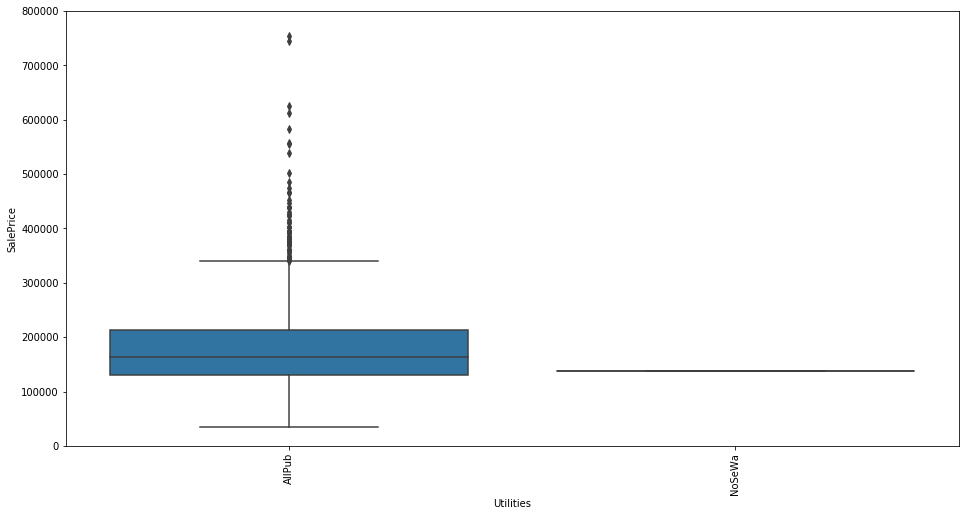

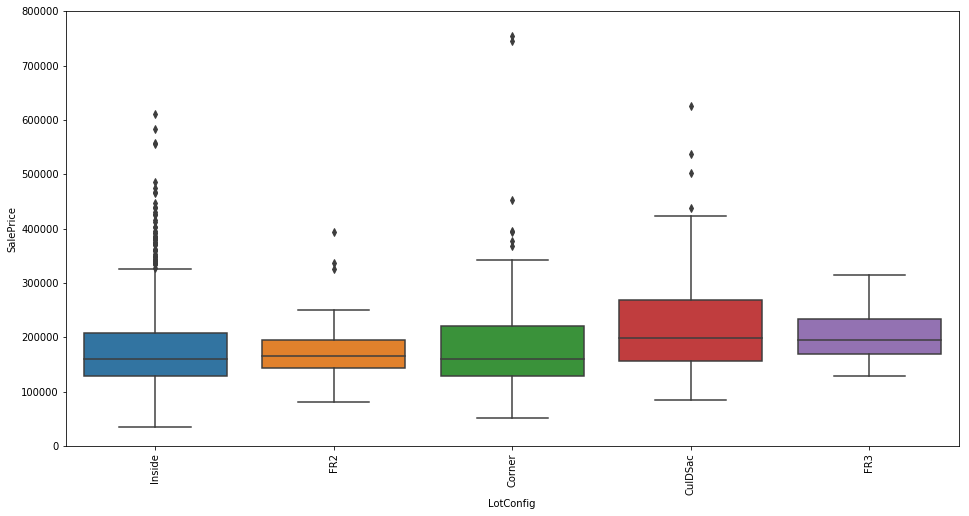

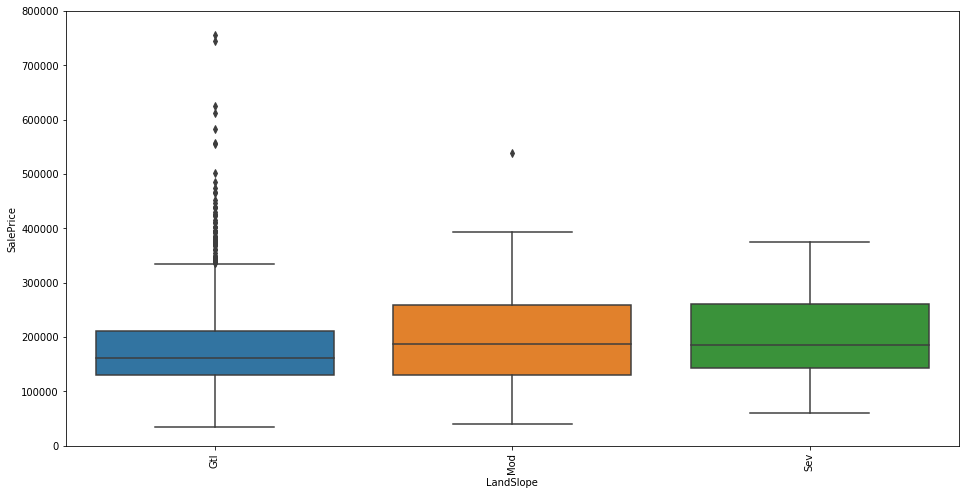

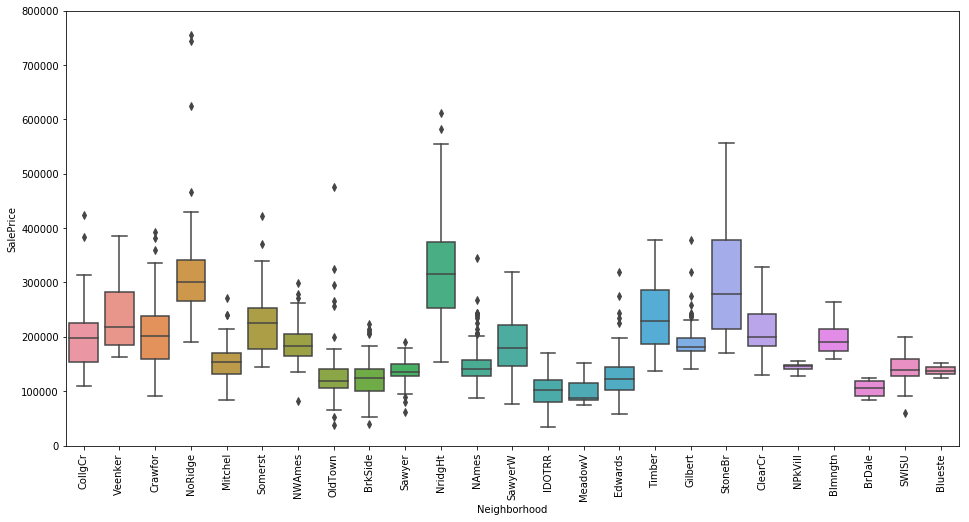

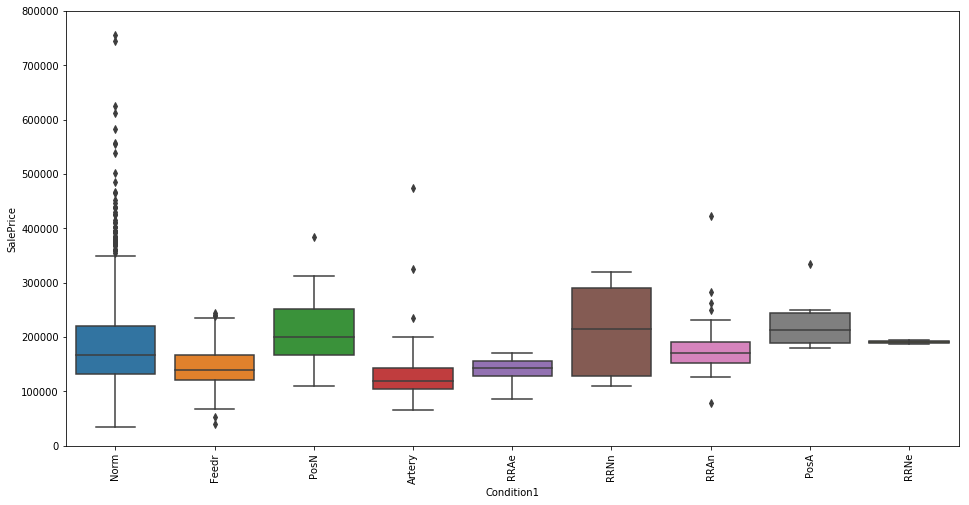

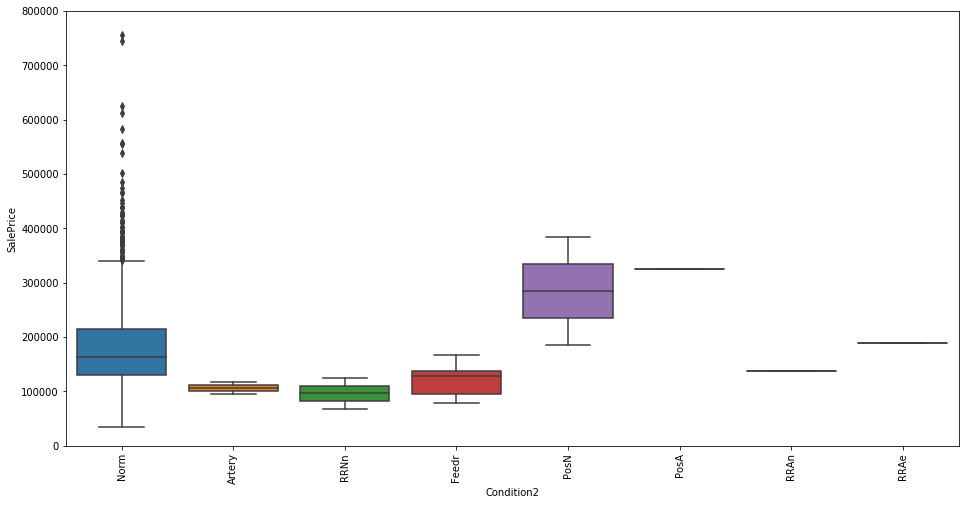

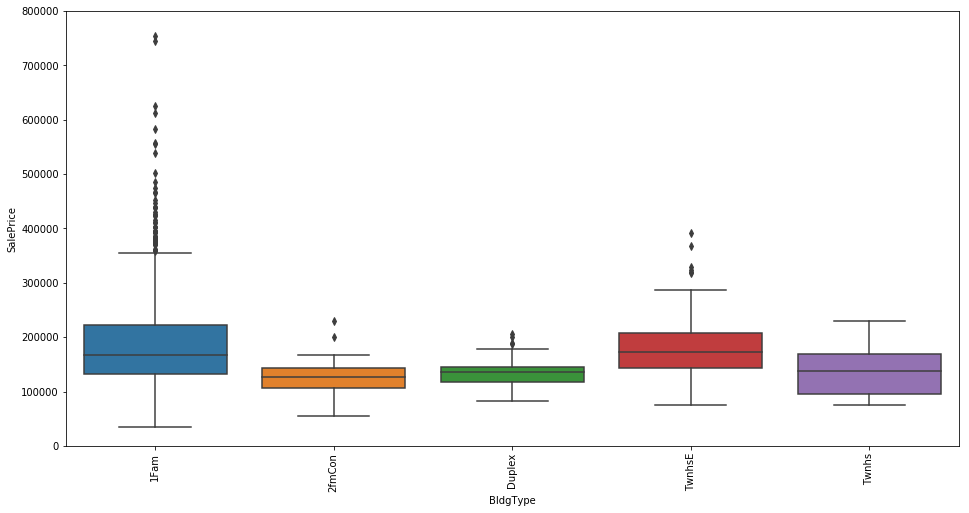

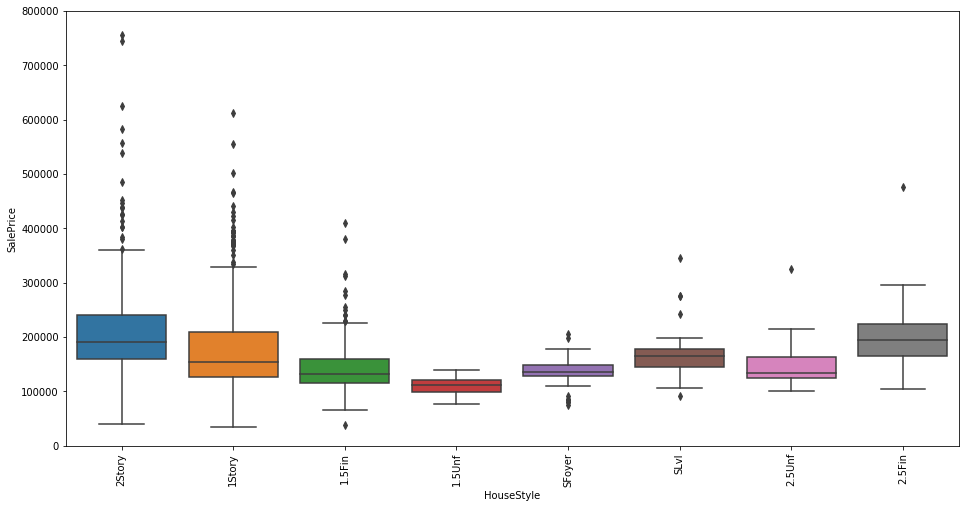

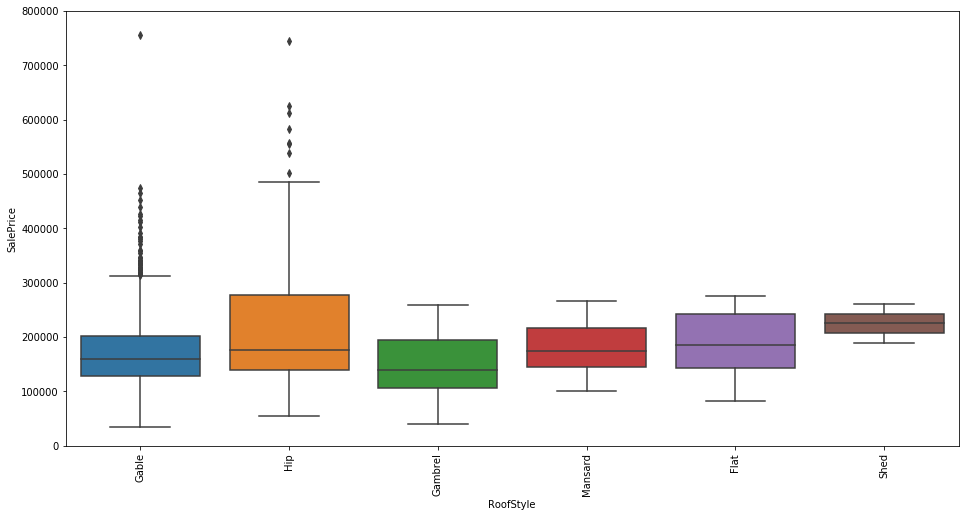

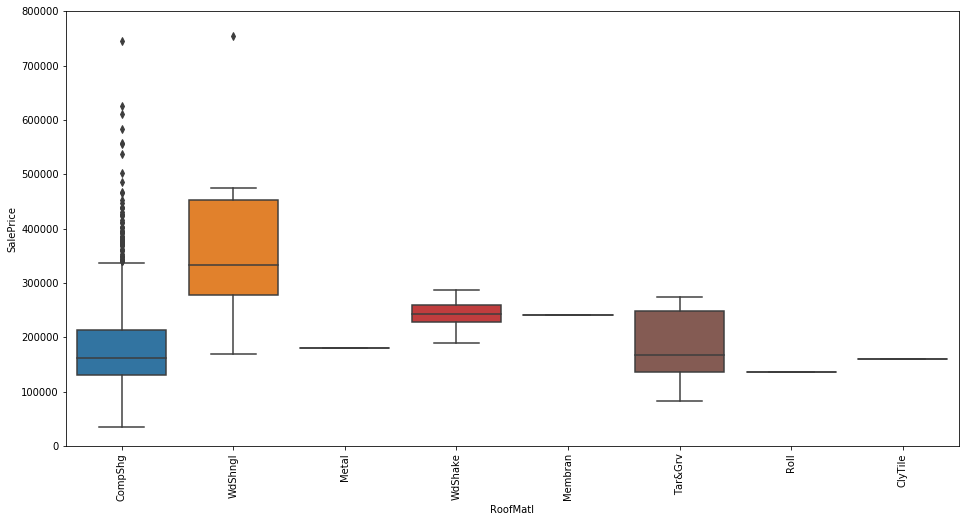

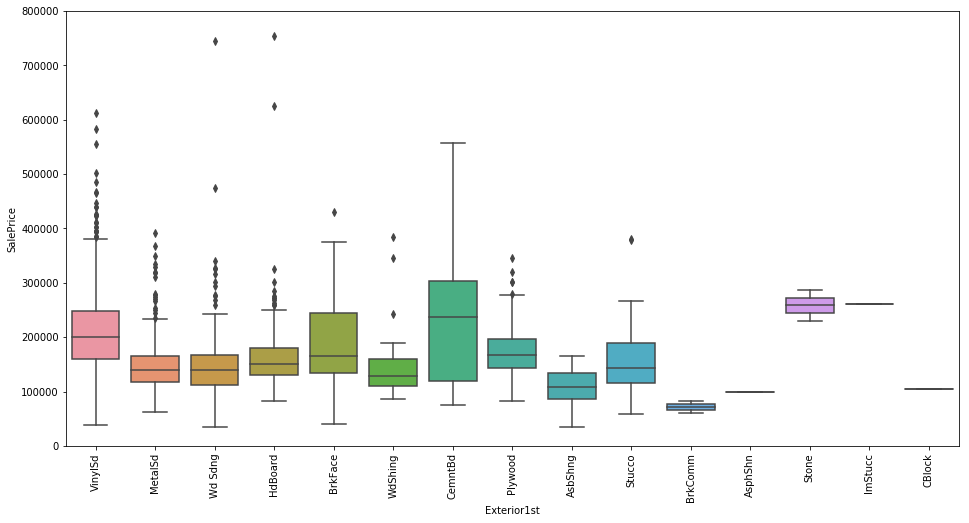

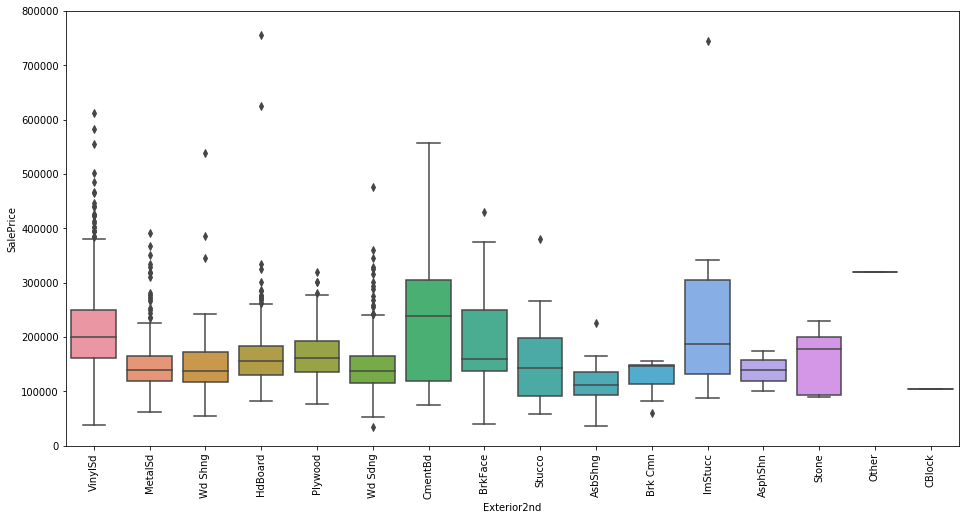

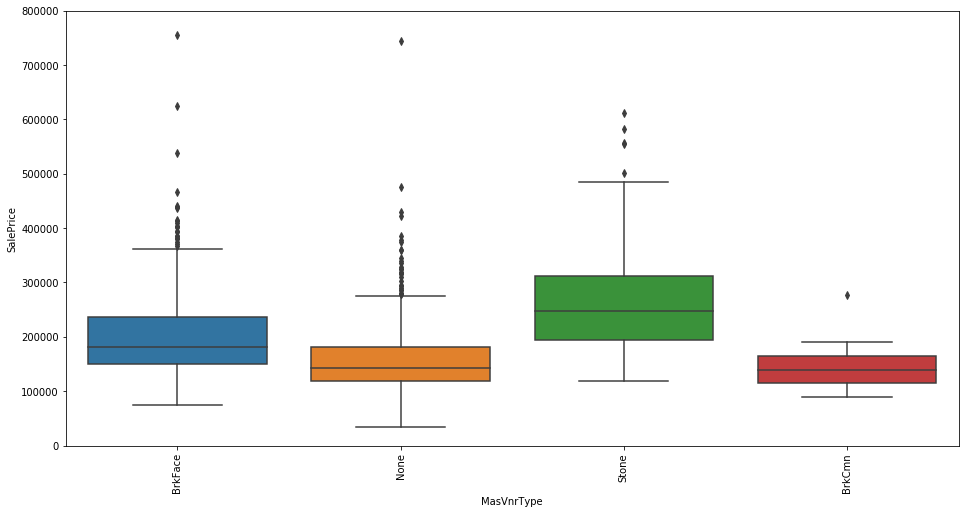

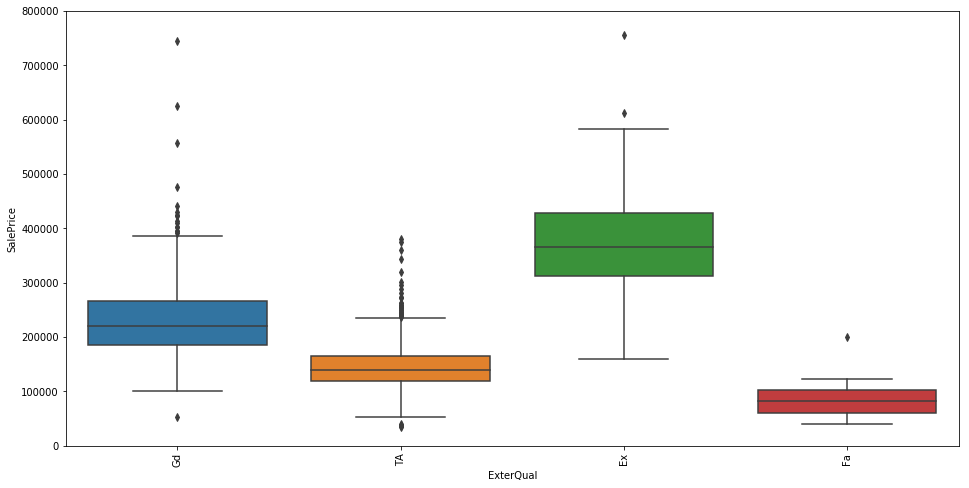

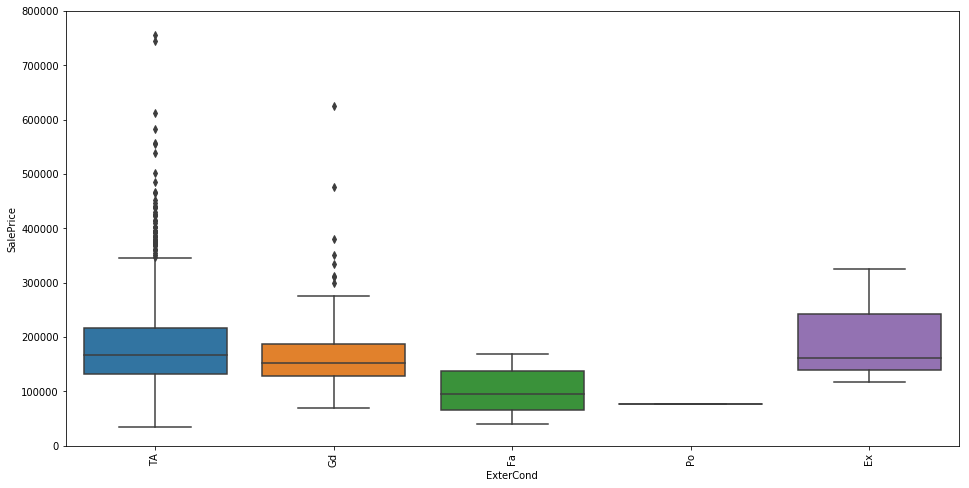

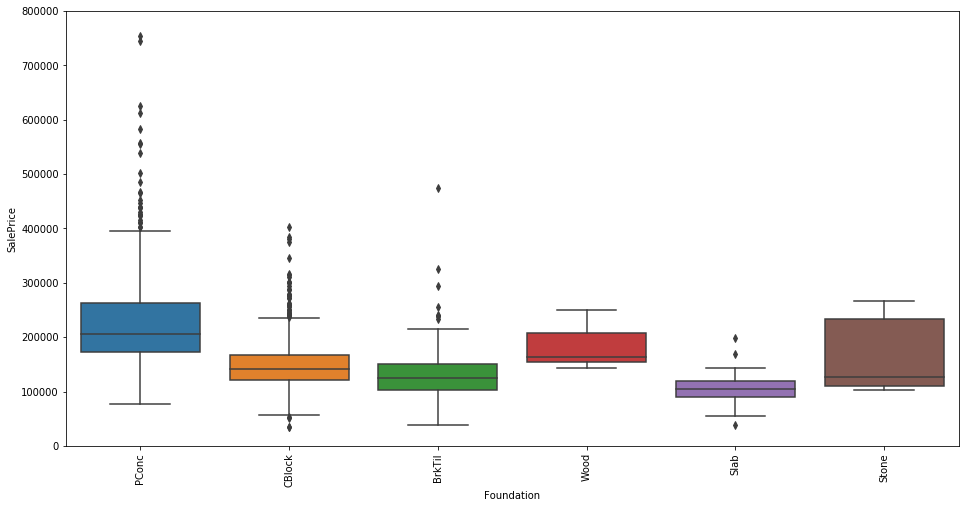

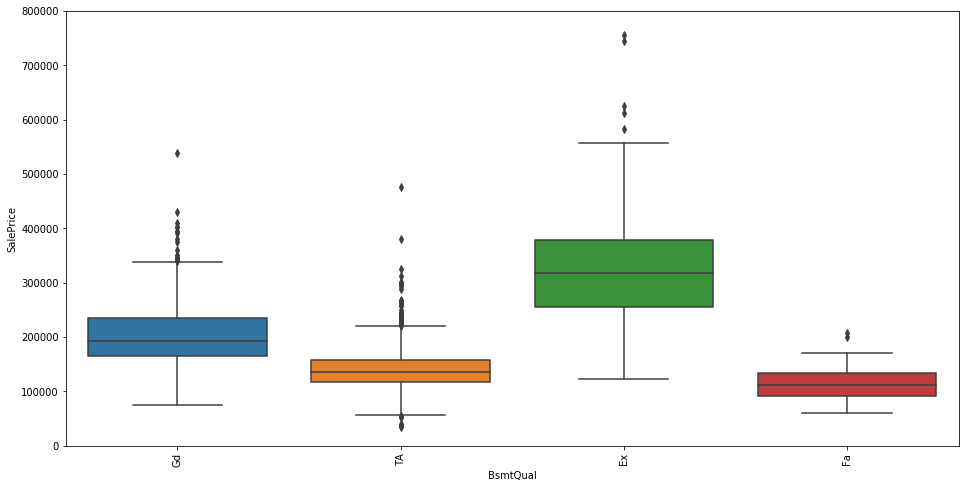

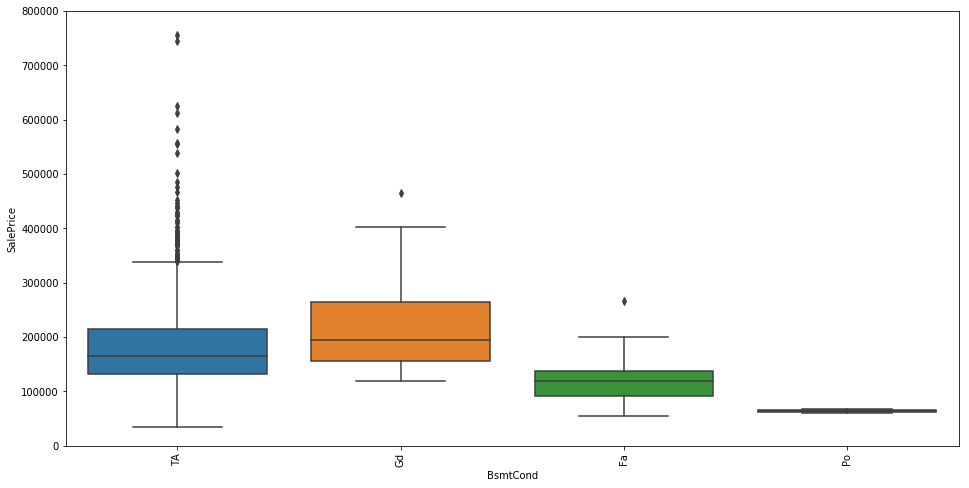

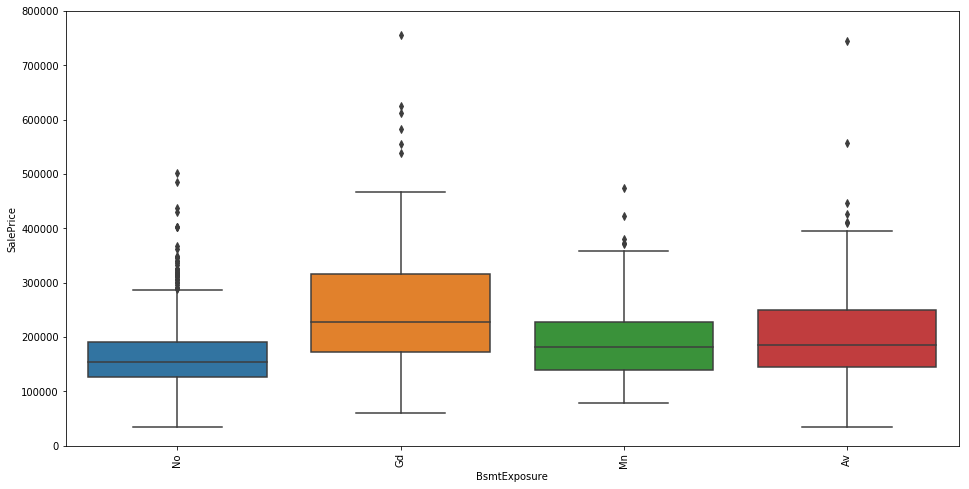

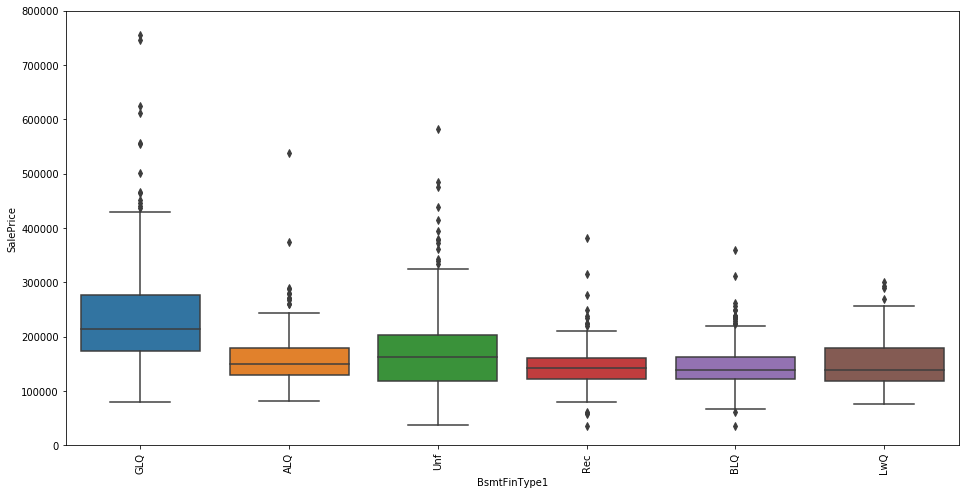

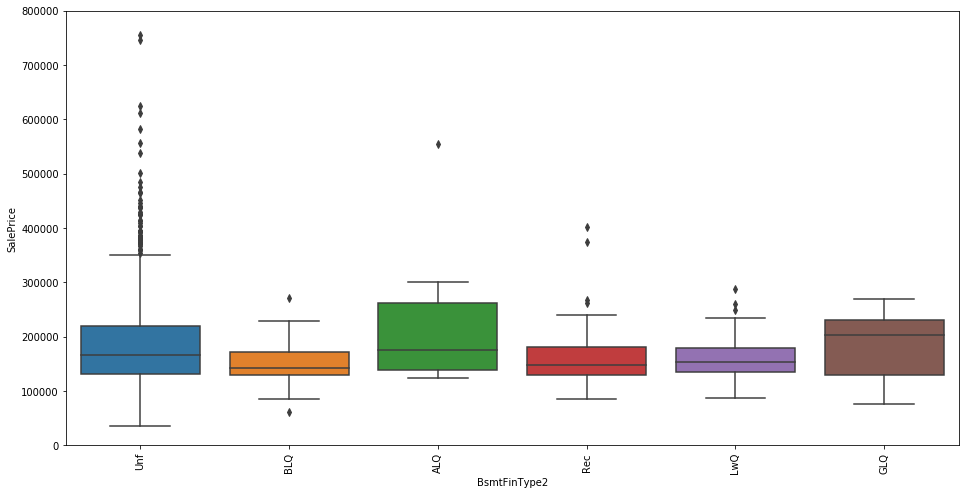

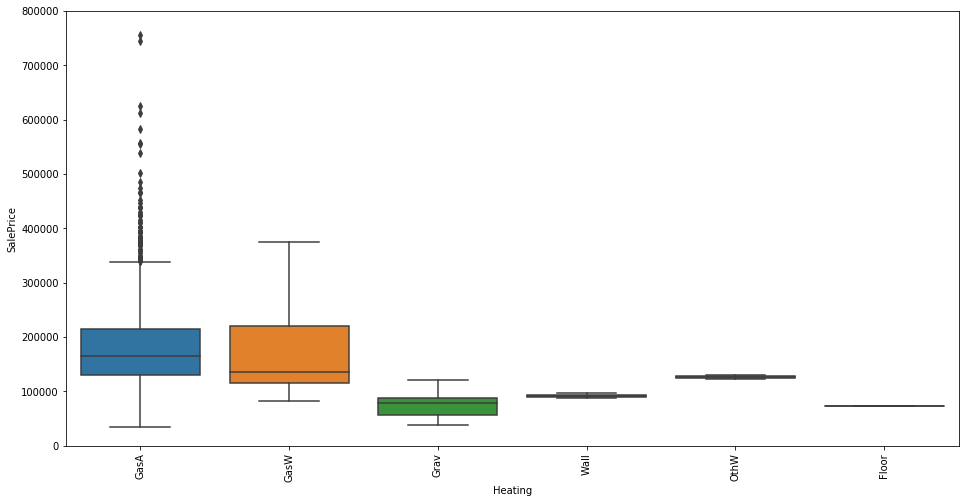

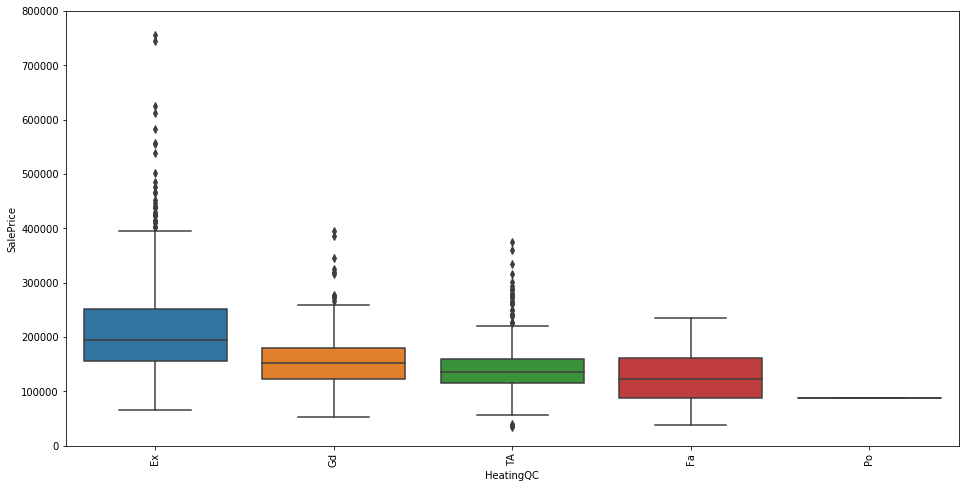

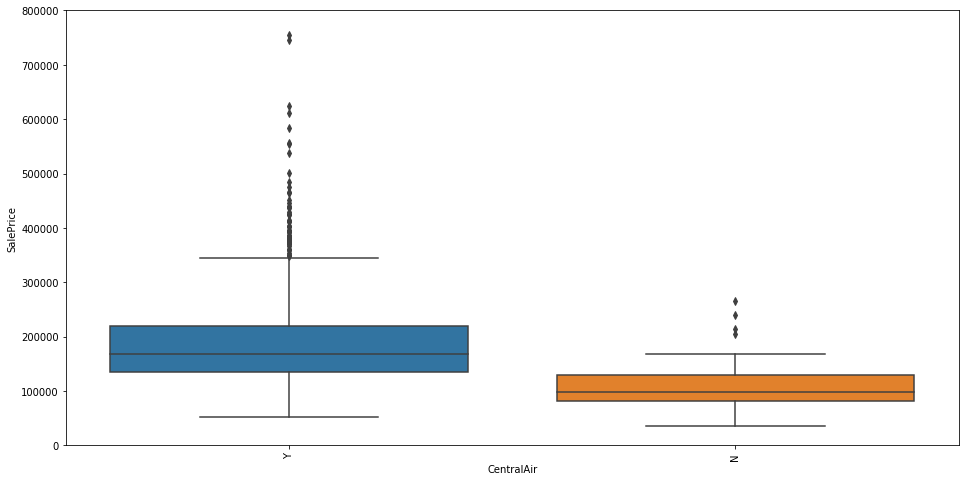

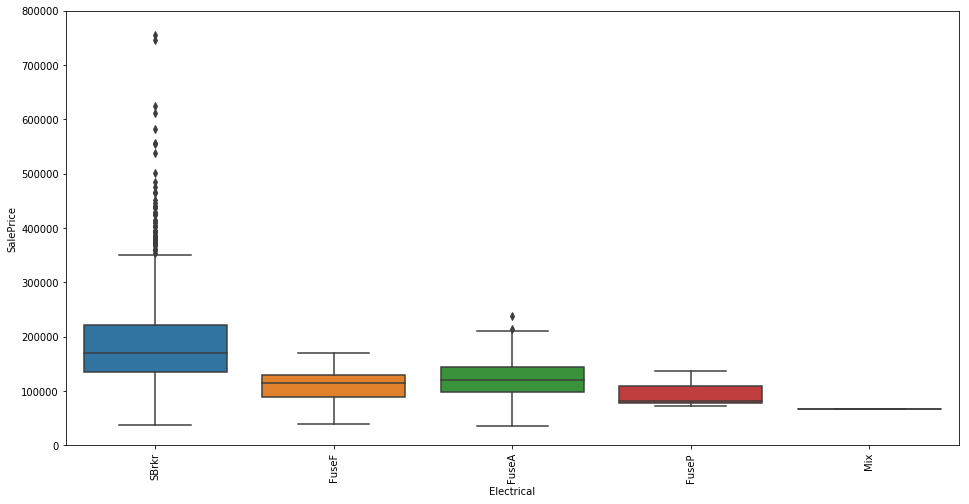

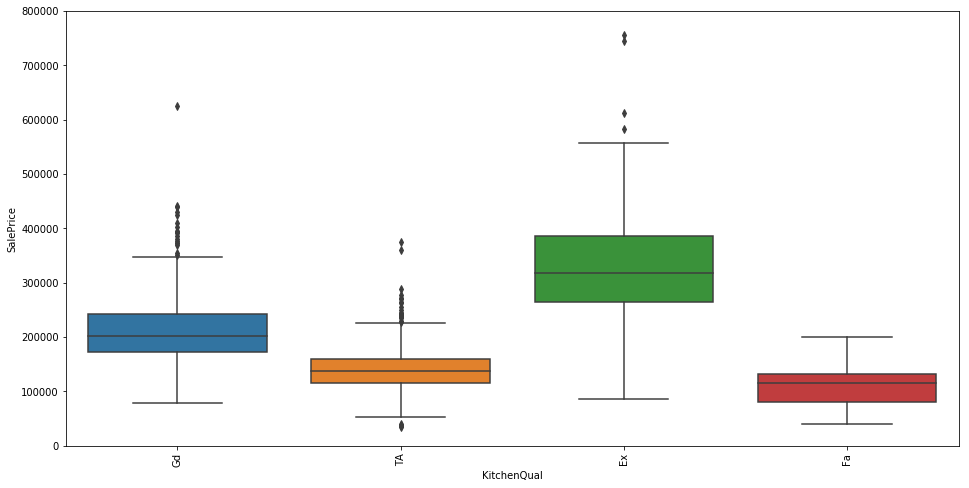

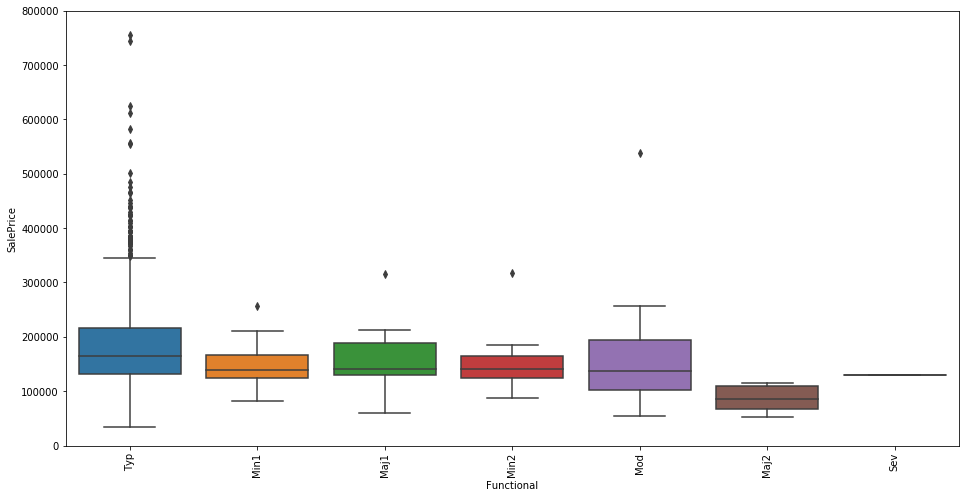

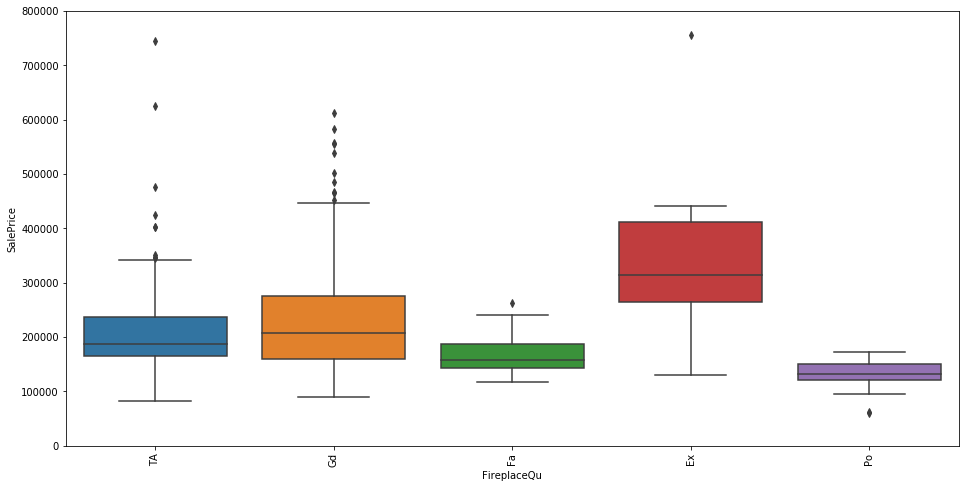

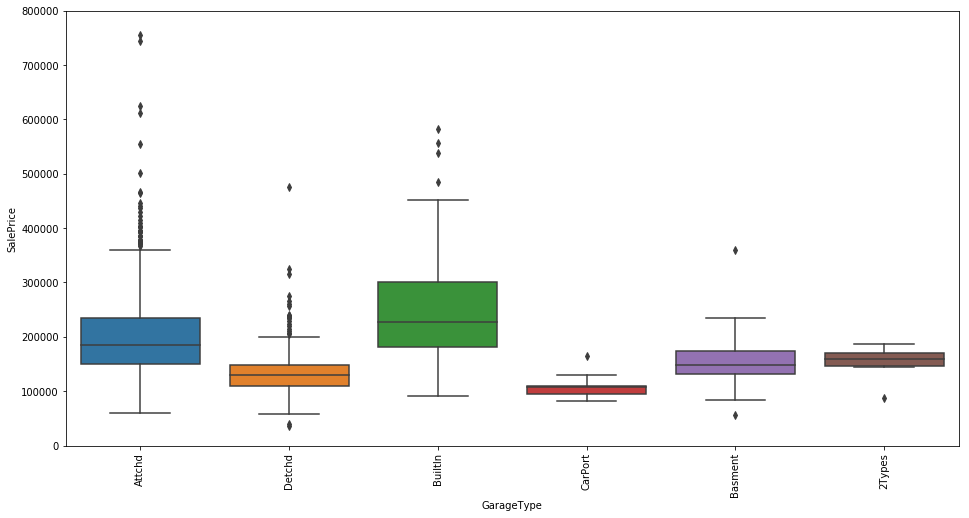

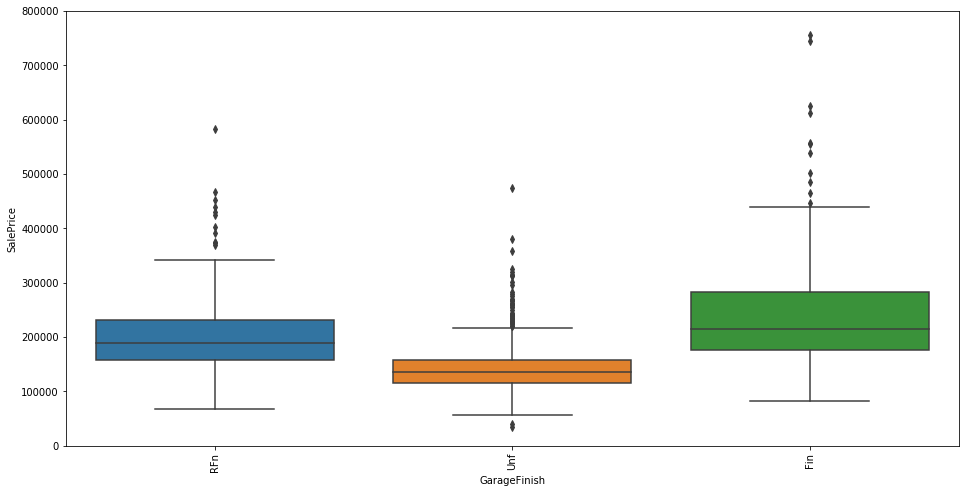

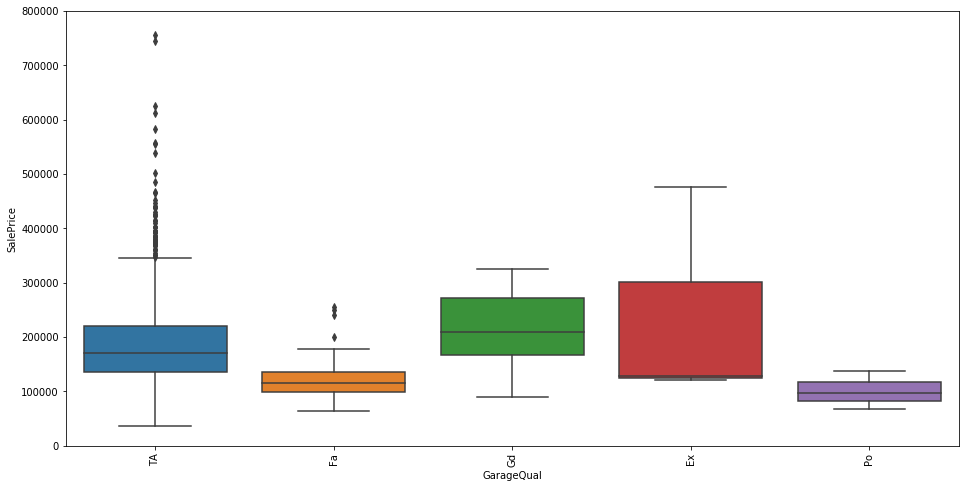

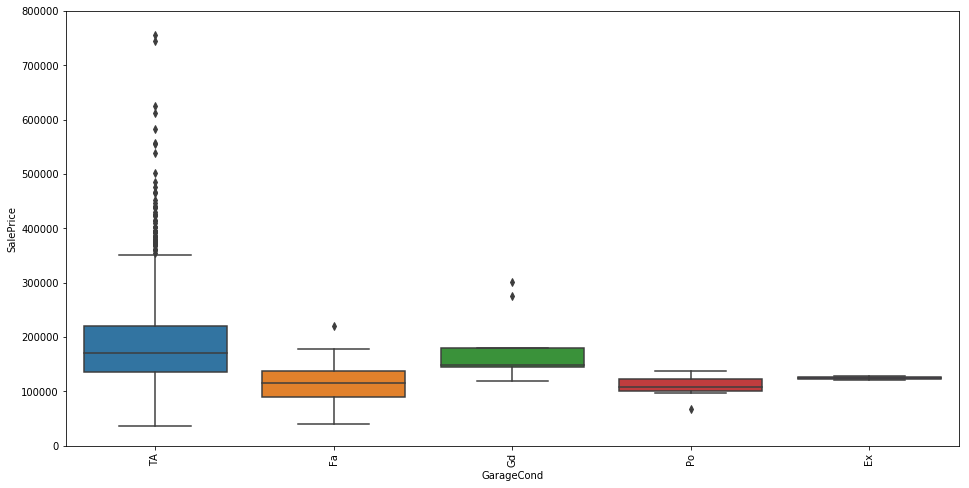

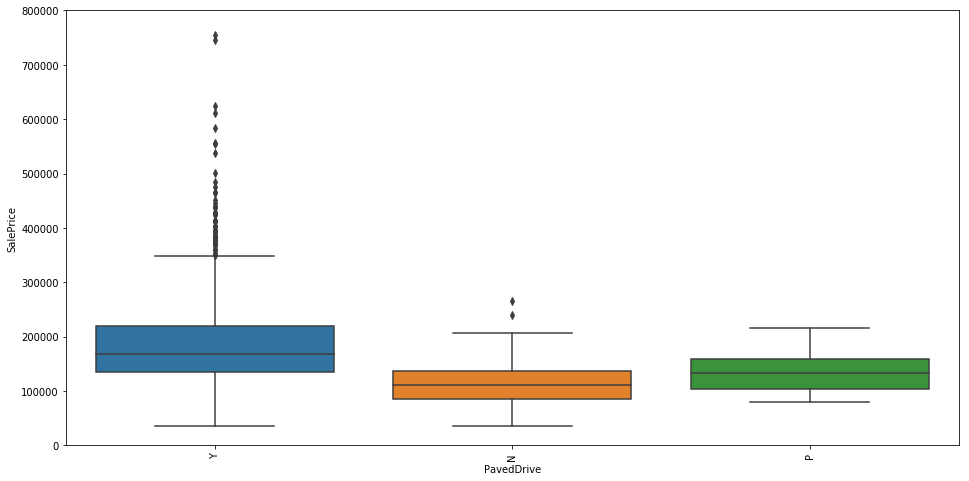

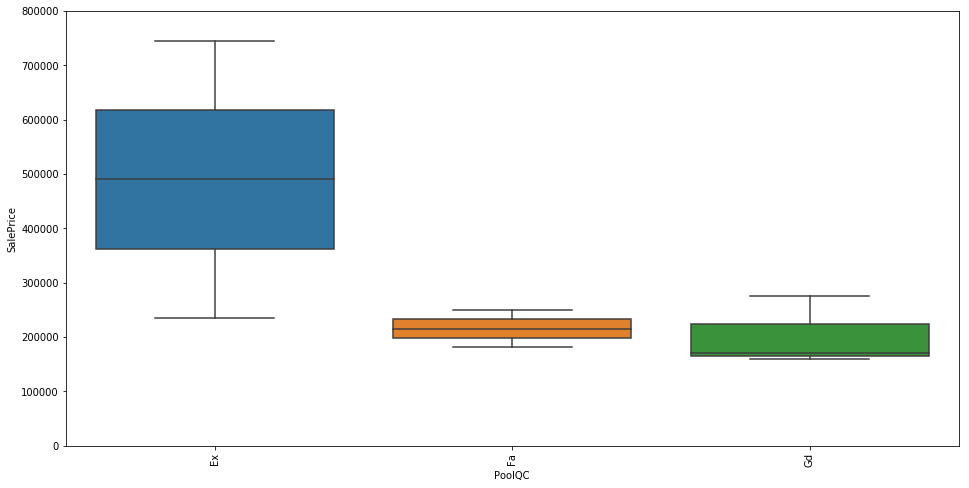

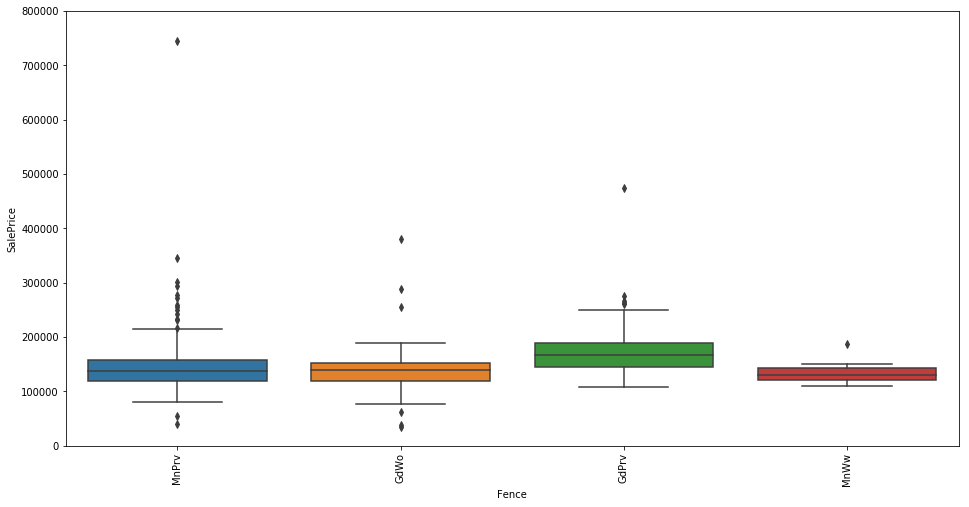

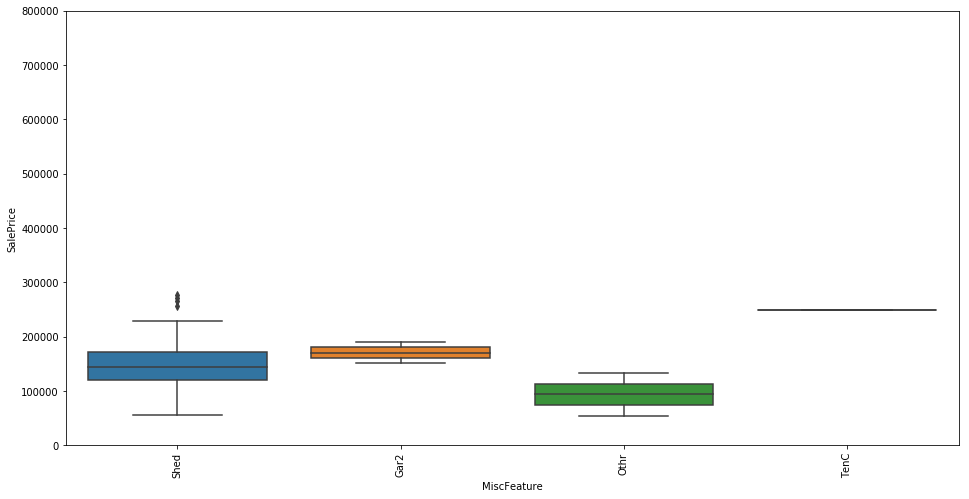

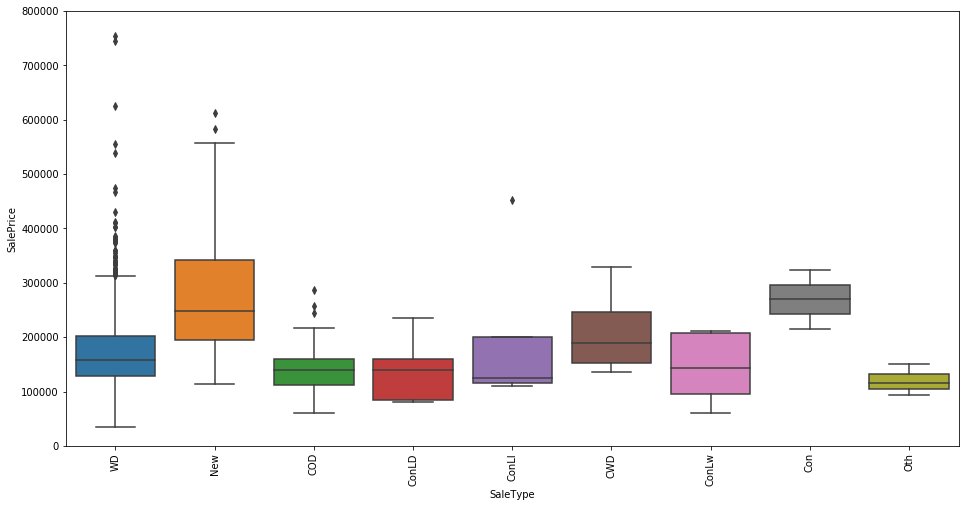

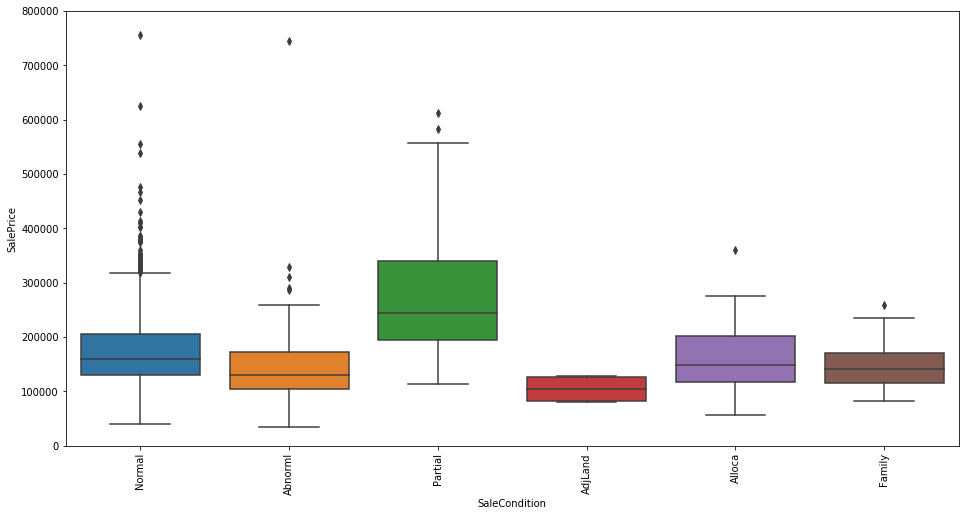

In [8]:
target = 'SalePrice'
for col in train.columns : 
    if col not in ("Id", target) and not np.issubdtype(train[col].dtype, np.number) : 
        # A new data frame is created with only the desired columns (the two we would like to display)
        df = pd.concat([train[target], train[col]], axis=1)
        f, ax = plt.subplots(figsize=(16, 8))
        fig = sns.boxplot(x=col, y=target, data=df)
        fig.axis(ymin=0, ymax=800000)
        plt.xticks(rotation=90)


#### Calculate correlations between variables
The best way to get a complete view of your dataset fairly quickly is to make a heatmap representing the correlations between variables.
The code below shows how to do that very quickly. Have a look to the documentation to determine which method has been used as default to calculate the correlations.

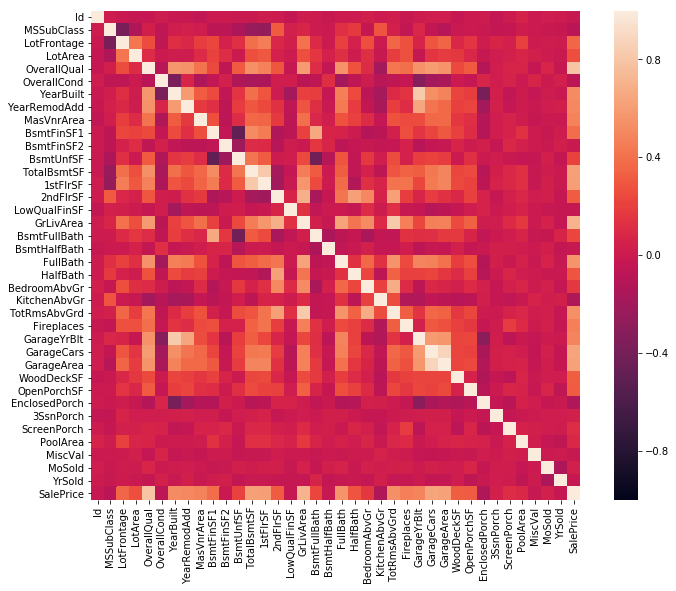

In [22]:
#correlation matrix
corrmat = train.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True);

We now focus on the 10 features that are the most correlated with the target feature.

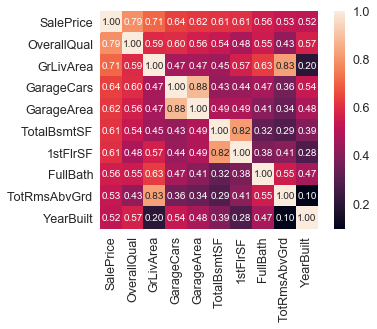

In [23]:
k = 10 #Number of features to consider

# We keep only the k most (negatively or positively) correlated features
cols = abs(corrmat).nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(train[cols].values.T)

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Data preparation

Most machine learning algorithms do not deal with missing data (NaN). One of the first challenges to adresse is to manage these missing values by replacing them with estimates.

We first check the ratio of missing values per feature.

In [24]:
#missing data
# the isnull method outputs a matrix of the same format as the train and for each element of this matrix
# sends a booleen: True if the value is a missing value (NaN), False if not
# Then we add the number of null values
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


We can see that the first 5 variables contain too many missing values, it is better not to use them.

The train and the test are merged in order to do the same formatting for the training and test game. This process is very classic.

In [25]:
data = pd.concat([train, test],axis = 'rows', sort=False) # merge the two datasets
data.reset_index(drop= True)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


**Instructions. Remove features:**
- With little correlation to the target (SalePrice) (between -0.4 and 0.4)
- With too many missing values (40%)

Pandas method to succeed in the task: 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [14]:
! pip install pandas --upgrade

Requirement already up-to-date: pandas in /Users/pitarch/Pro/Soft/anaconda3/lib/python3.6/site-packages (0.23.4)
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
# With little correlation
colsToDelCorr = [x for x in corrmat[abs(corrmat)['SalePrice'] < 0.4].index if x != "Id"]

# With too many missing values 
colsToDelMissing = missing_data[missing_data.Percent >= 0.4].index

# The columns to drop are the union (| performs the union between two sets) of colsToDelCorr and colsToDelMissing
colsToDel = list(set(colsToDelCorr) | set(colsToDelMissing))

print(colsToDel)

data= data.drop(colsToDel, axis=1)
data.head()
print(data.shape)

['BedroomAbvGr', 'MiscFeature', 'Fence', 'MiscVal', '3SsnPorch', 'MoSold', 'BsmtFinSF2', 'KitchenAbvGr', 'PoolArea', 'LowQualFinSF', 'FireplaceQu', 'YrSold', 'BsmtHalfBath', 'LotArea', 'OpenPorchSF', 'OverallCond', 'ScreenPorch', 'WoodDeckSF', 'BsmtFullBath', 'PoolQC', 'BsmtUnfSF', 'Alley', 'HalfBath', '2ndFlrSF', 'BsmtFinSF1', 'LotFrontage', 'MSSubClass', 'EnclosedPorch']
(2919, 53)


#### Replace NaN values

Now you have to replace missing values in order to make sense of them.

Pandas method to succeed in the task: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

For example, you can replace missing values with the most frequent value, or the mean, median...

**Instructions. Replace the NaN values of the other variables.**

In [14]:
# Replace NaN values in LotFrontage with the mean
# data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

# Replace NaN values in Alley with the mean
# data['Alley'] = data['Alley'].fillna('NOACCESS')

for col in data.columns : 
    if col != "SalePrice" and data[col].isnull().any() : 
        print(col)
        if not np.issubdtype(data[col].dtype, np.number) : 
            data[col] = data[col].fillna('MISSING')
        else : 
            data[col] = data[col].fillna(data[col].mean())

MSZoning
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
TotalBsmtSF
Electrical
KitchenQual
Functional
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
SaleType


#### Converting categorical features into numerical features

Very few machine learning algorithms do not take the categorical variables as inputs, they need numerical values.
It is thus necessary to convert them into numerical features.

To remedy this there exists several methods:
 - Label encoding** (for example, replace the values[right, left, walkers] with[0, 1, 2])
 - One Hot encoding (for example, replace the values[right, left, walkers] with 3 binary variables)
 - One advanced method: the target encoding** (work it out)
 
Resources : 
 - Sklearn method for label encoding: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
 - Pandas method for one hot encoding: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
 - Video on the target encoding: https://fr.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv
 
**Instructions.** Apply the one hot encoding on all categorical features.

In [15]:
for col in data.columns : 
    if not np.issubdtype(data[col].dtype, np.number) :
        data = pd.concat([data,pd.get_dummies(data[col], prefix=col,dummy_na=True)],axis=1).drop([col],axis=1)

#### Data normalization

Now the DataFrame is ready, it is a good habit to **normalize the data** if you use algorithms of machine learning such as SVM or KNN.


In [16]:
data.shape

(2919, 305)

**Instructions.** Apply the MinMaxScaler to normalize the data. 

**Resources.** This Stack Overflow entry should be of interest: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

In [17]:
from sklearn.preprocessing import MinMaxScaler

colsToScale = [x for x in data.columns if x not in  ["SalePrice", "Id"]]
mms = MinMaxScaler()
data[colsToScale] = mms.fit_transform(data[colsToScale])

#### Split the data into train and test.

In [18]:
is_test = data['SalePrice'].isnull()  # Masque afin de séparer la base d'entrainement et de test
# car dans le test nous ne connaissons pas la valeur de la variable cible donc ils ont comme valeur NaN
train = data[~is_test]  # la tilde est la négation
test = data[is_test].drop('SalePrice', axis = 'columns')

#### Do some sanity check
Always check your code before training 

`assert` returns an error if the condition is wrong

In [19]:
assert len(train) == 1460 # Check the size of the training set
assert len(test) == 1459 # Check the size of the test set
assert train.isnull().sum().sum() == 0 # Check if there still exists NaN values
assert test.isnull().sum().sum() == 0 # Check if there still exists NaN values

#### Model validation

In [20]:
# X are the training data and Y the prices to predict
X_train = train.drop(['SalePrice',"Id"], axis = 'columns')
Y_train = train['SalePrice']

The problem is measured using the RMSE, which is the average square deviation between the predicted value and the true value.
$$\sqrt{\frac{1}{n} \sum^n_{i=1}(\overline{y_i} - y_i)^2}$$
The goal is to minimize this evaluation metric.

After the data formatting, the evaluation of the model is the most important. It is **necessary** to evaluate your model. 

Validation of the model provides us with information on its performance, if new additions or modifications to the data have enable the model to better predict. Also it informs us if there is overfit (the worst enemy in machine learning)

In [21]:
  def rmse(predictions,targets):
    """Implementation of RMSE
    
    Arguments:
      predictions {np array} -- Predicted value
      targets {np array} -- True value
    
    Returns:
      float -- RMSE score
    """
    return np.sqrt(np.mean((predictions-targets)**2))

The validation method we will use is **cross-validation**.

**Cross-validation** is, in machine learning, **a method of estimating the reliability of a model** based on a sampling technique.

Suppose you have a statistical model with one or more unknown parameters, and a set of learning data on which you can train the model. The learning process optimizes the model parameters to match the data as closely as possible. If an independent validation sample is then taken from the same training population, it will generally turn out that the model does not respond as well to validation as it did during training: sometimes it is called overlearning. Cross-validation is a way to predict the effectiveness of a model on a hypothetical validation set when an independent and explicit validation set is not available.

![k_fold_cross_validation](img/cross_val.png)

**k-fold cross-validation**: the original sample is divided into k samples, then one of k samples is selected as the validation set and the other k-1 samples will constitute the learning set. The performance score is calculated as in the first method, then the operation is repeated by selecting another validation sample from among the k-1 samples that have not yet been used for model validation. The operation is repeated k times so that in the end each sub-sample was used exactly once as a validation set. The mean of the k root mean square errors is finally calculated to estimate the prediction error.

**Déclaration of the model**

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Try to use some others!!

**Cross-validation**

In [23]:
from sklearn.model_selection import KFold


# Split the dataset into 5 folds using a predefined seed (for reproducibility purpose)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
CV = KFold(n_splits = 5,random_state = 42) 


# List to save the model values for each fold
fit_score = [] 
val_score = []

verbose = False # Set it to True if you want aditionnal infos to be displayed

# enumerate is a predifined keyword in Python: https://docs.python.org/3/library/functions.html#enumerate
for i, (fit_index,val_index) in enumerate(CV.split(X_train,Y_train)):
    
    X_fit = X_train.iloc[fit_index]
    Y_fit = Y_train.iloc[fit_index]
    X_val = X_train.iloc[val_index]
    Y_val = Y_train.iloc[val_index]
    
    
    model.fit(X_fit,Y_fit)
    
    pred_fit = model.predict(X_fit)
    pred_val = model.predict(X_val)
    
    if verbose :
        print(f'Rmse fit for fold {i+1} : {rmse(pred_fit,Y_fit):.3f}')
        print(f'Rmse val for fold {i+1} : {rmse(pred_val,Y_val):.3f}')
    
    fit_score.append(rmse(pred_fit,Y_fit))
    val_score.append(rmse(pred_val,Y_val))

fit_score = np.array(fit_score)
val_score = np.array(val_score)

print(f'RMSE score for fit :{np.mean(fit_score):.3f} ± {np.std(fit_score):.3f}')
print(f'RMSE score for val :{np.mean(val_score):.3f} ± {np.std(val_score):.3f}')

RMSE score for fit :21762.464 ± 1081.334
RMSE score for val :342677049257541.625 ± 264347563976870.469


**Instructions.** Some areas for improvment: 
- Try other models on scikit learn to start with such as random forest and svm
- Try to train a model with lightgbm regressor with early stopping (out of the scope of this course)
- Try to make out-of-fold bagging that will improve your final prediction (out of the scope of this course)

#### Prediction and generation of the output fimle

At this point, you trained k models and have an idea on how effective is your solution (the features used, the algorithms and its parameters).
We are now training our model on all train data because previously, we only used $\frac{4}{5}$ of our data in cross-validation.

In [24]:
model.fit(X_train,Y_train)
pred = model.predict(test.drop(['Id'],axis = 'columns'))

If you want to participate to a machine learning competition (e.g., Kaggle), you need to submit to prediction and thus to first write it in a file. You will find below some piece of code to achieve this goal.

In [25]:
submission = pd.DataFrame()
submission['Id'] = np.array(test['Id'])
submission['SalePrice'] = pred
submission.head()

,Id,SalePrice
0,1461,107404.3125
1,1462,151991.0000
2,1463,183508.2500
3,1464,186746.2500
4,1465,206138.5000


In [26]:
filename = f'submission_{np.mean(val_score):.3f}_{np.std(val_score):.3f}'
submission.to_csv(f'{filename}',index =False)